In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/17_SVM/forestfires.csv")

In [3]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Text(0.5, 1.0, 'area')

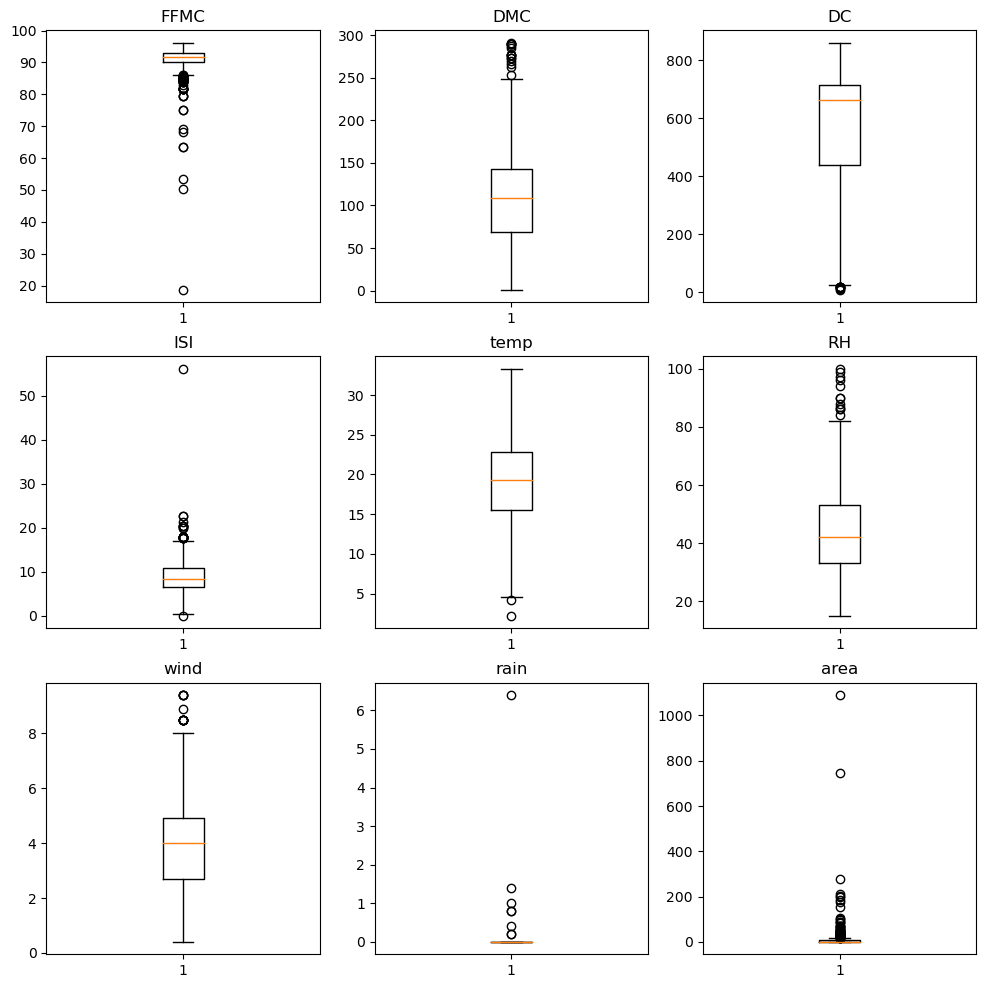

In [5]:
fig,axs=plt.subplots(3,3,figsize=(12,12))
axs[0,0].boxplot(dataset.FFMC)
axs[0,1].boxplot(dataset.DMC)
axs[0,2].boxplot(dataset.DC)
axs[1,0].boxplot(dataset.ISI)
axs[1,1].boxplot(dataset.temp)
axs[1,2].boxplot(dataset.RH)
axs[2,0].boxplot(dataset.wind)
axs[2,1].boxplot(dataset.rain)
axs[2,2].boxplot(dataset.area)
axs[0,0].set_title("FFMC")
axs[0,1].set_title("DMC")
axs[0,2].set_title("DC")
axs[1,0].set_title("ISI")
axs[1,1].set_title("temp")
axs[1,2].set_title("RH")
axs[2,0].set_title("wind")
axs[2,1].set_title("rain")
axs[2,2].set_title("area")

<AxesSubplot:xlabel='area', ylabel='Density'>

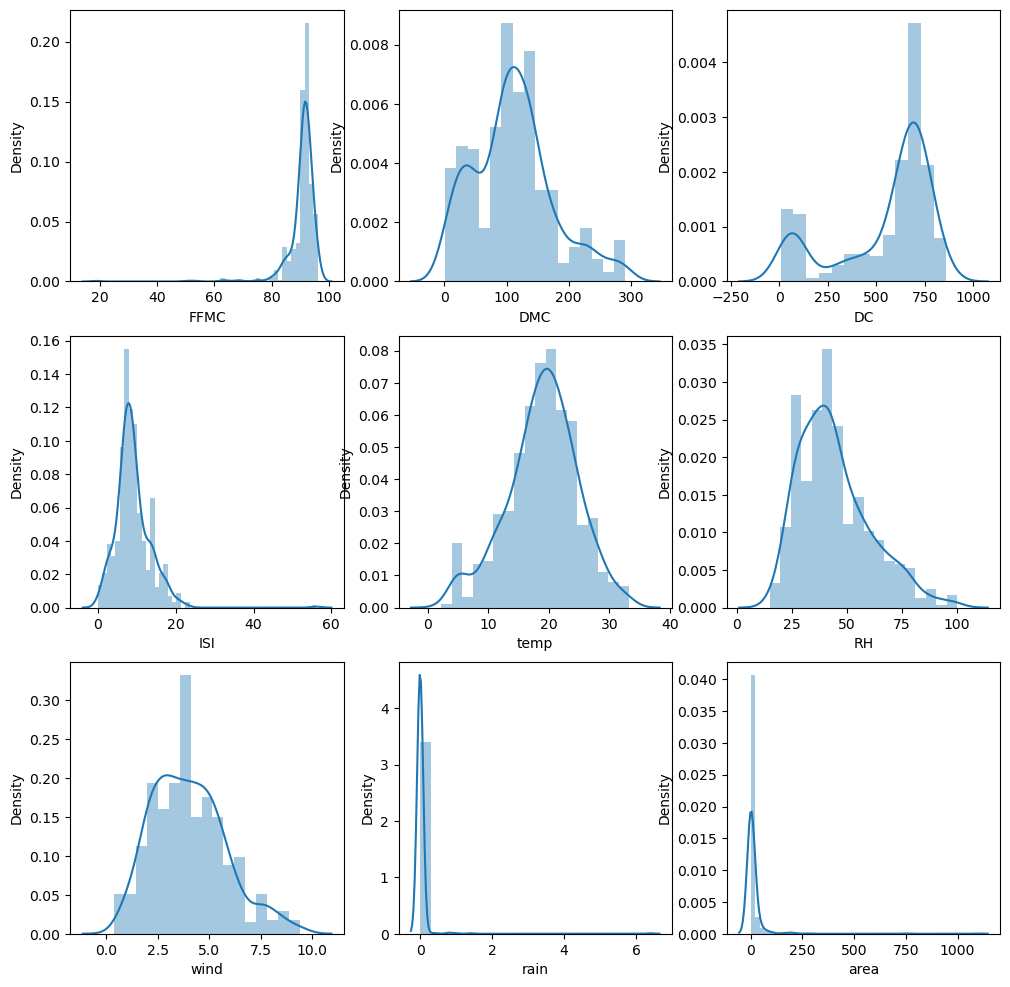

In [6]:
fig,axs=plt.subplots(3,3,figsize=(12,12))
sns.distplot(dataset.FFMC,ax=axs[0,0])
sns.distplot(dataset.DMC,ax=axs[0,1])
sns.distplot(dataset.DC,ax=axs[0,2])
sns.distplot(dataset.ISI,ax=axs[1,0])
sns.distplot(dataset.temp,ax=axs[1,1])
sns.distplot(dataset.RH,ax=axs[1,2])
sns.distplot(dataset.wind,ax=axs[2,0])
sns.distplot(dataset.rain,ax=axs[2,1])
sns.distplot(dataset.area,ax=axs[2,2])

In [7]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [8]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [9]:
def ROC_AUC(y_test,y_pred_prob):
    classes = "0 vs 1"

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

Accuracy of svm classifier on training set: 0.7554
Accuracy of svm classifier on test set: 0.7404
Mean accuracy of kfold cross validation:  0.7542609351432882


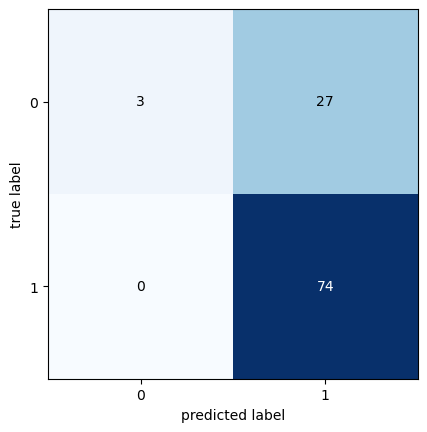


Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.87
Macro Recall: 0.55
Macro F1-score: 0.51

Weighted Precision: 0.81
Weighted Recall: 0.74
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        30
           1       0.73      1.00      0.85        74

    accuracy                           0.74       104
   macro avg       0.87      0.55      0.51       104
weighted avg       0.81      0.74      0.65       104

AUC score 0.55


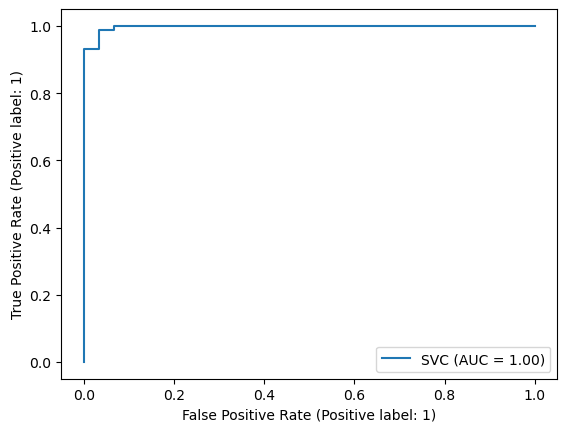

In [10]:
def model(dataset):  
    label_encoder = preprocessing.LabelEncoder()
    dataset['size_category']= label_encoder.fit_transform(dataset['size_category'])
    X=dataset.iloc[:,2: -1]# independant variables(dropping month and day)
    y = dataset.iloc[:,-1] #dependant variable

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    clf= SVC()
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
#     y_pred_prob=clf.predict_proba(X)
    
    ## kfold cross validation
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    results = cross_val_score(clf, X, y, cv=kfold)
    print("Mean accuracy of kfold cross validation: ",results.mean())
    
    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)
    
    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred))

model(dataset)


Accuracy of svm classifier on training set: 0.7990
Accuracy of svm classifier on test set: 0.7404


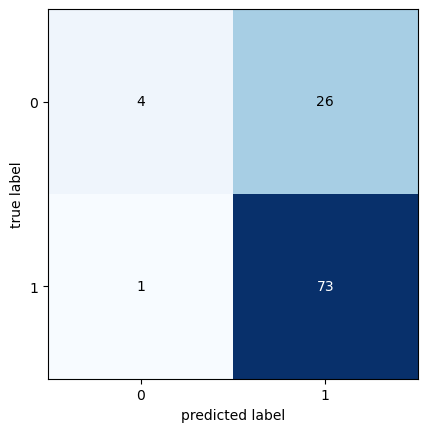


Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.77
Macro Recall: 0.56
Macro F1-score: 0.54

Weighted Precision: 0.76
Weighted Recall: 0.74
Weighted F1-score: 0.67

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.13      0.23        30
           1       0.74      0.99      0.84        74

    accuracy                           0.74       104
   macro avg       0.77      0.56      0.54       104
weighted avg       0.76      0.74      0.67       104

AUC score 0.5599099099099099


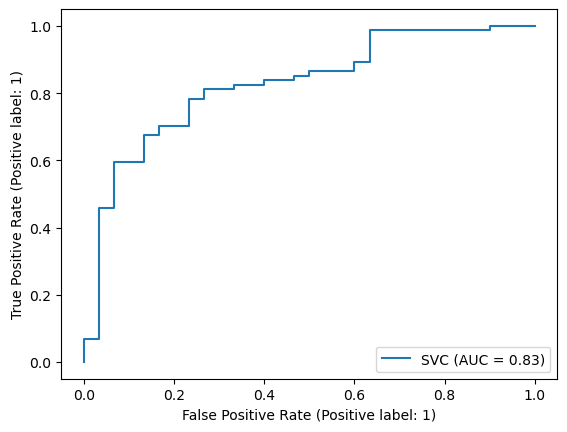

In [11]:
def model_scaling(dataset):
    label_encoder = preprocessing.LabelEncoder()
    dataset['size_category']= label_encoder.fit_transform(dataset['size_category'])

    X=dataset.iloc[:,2:-1]# independant variables
    y = dataset.iloc[:,-1] #dependant variable
    

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
      
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    clf= SVC()
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X)

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred)) 
    
model_scaling(dataset)

In [12]:
##Hypertuning parameters
#List Hyperparameters that we want to tune.
X=dataset.iloc[:,2:-1]# independant variables
y = dataset.iloc[:,-1] #dependant variable

#train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
kernel = ['rbf','sigmoid','linear','poly']
gamma=[100,50,0.5,0.1,0.01,0.001,0.0001]
C=[15,14,13,12,11,10,0.1,0.001,0.0001]


#Convert to dictionary
hyperparameters = dict(kernel=kernel, gamma=gamma, C=C)
#Create new KNN object
svm = SVC()
#Use GridSearch

clf = GridSearchCV(svm, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_,best_model.best_score_)



{'C': 15, 'gamma': 100, 'kernel': 'linear'} 0.9878629500580722


Accuracy of svm classifier on training set: 1.0000
Accuracy of svm classifier on test set: 0.9808
Mean accuracy of kfold cross validation:  0.9903469079939669


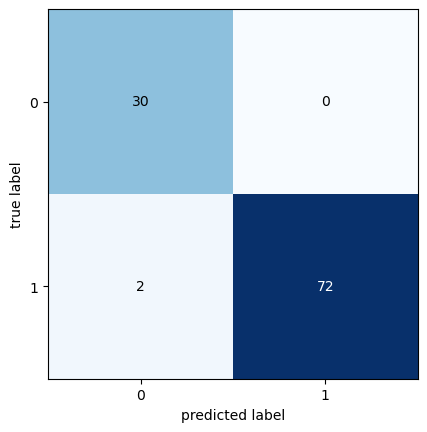


Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.97
Macro Recall: 0.99
Macro F1-score: 0.98

Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98

Classification Report

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.97      0.99        74

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104

AUC score 0.9864864864864865


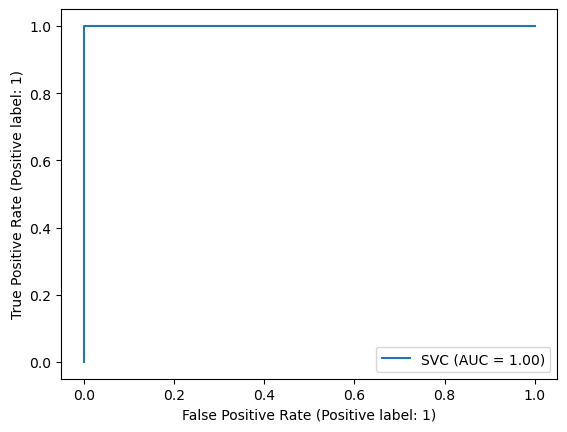

In [14]:
def model_tuned(dataset):
    label_encoder = preprocessing.LabelEncoder()
    dataset['size_category']= label_encoder.fit_transform(dataset['size_category'])
    X=dataset.iloc[:,2: -1]# independant variables(dropping month and day)
    y = dataset.iloc[:,-1] #dependant variable

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    clf= SVC(C= 15, gamma= 100, kernel= 'linear')
    clf.fit(X_train, y_train)
    print('Accuracy of svm classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of svm classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
#     y_pred_prob=clf.predict_proba(X_test)
#     y_pred_prob=clf.predict_proba(X)
    
    ## kfold cross validation
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    results = cross_val_score(clf, X, y, cv=kfold)
    print("Mean accuracy of kfold cross validation: ",results.mean())
    
        
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    metrics.plot_roc_curve(clf,X_test,y_test)
    print("AUC score", metrics.roc_auc_score(y_test,y_pred))    
model_tuned(dataset)


## After hypertuning the model is giving best accuracy. Hence this model can be used for classification of forest.
